# Differential Equations and Yeast Growth Rates
## Morgan Baxter
### MATH 219 Project 3

Yeast is a relatively simple single-cell organism that converts carbohydrates into CO2 and ethanol alcohol during the process of fermentation. In this project, I seek to solve a system of differential equations that can be applied to existing data about yeast growth, and then try to fit my system to the data.

We are given the following system of differential equations.

$$\frac{d P}{d t} = c \frac{q(t)}{1 + q(t)} P(t) \left (1 - \left ( \frac{P(t)}{N} \right)^m \right ) $$

$$\frac{d q(t)}{d t} = k \cdot q(t), q(0) = q_0$$

First, we can solve for $q(t)$ from the second equation using seperable methods. Collecting terms, integrating, raising both sides to the power of $e$, and invoking the initial conditions $q(0) = q_0$, our solution is:

$$q(t) = q_0 e^{kt} $$

That wasn't too hard!


We then seek to carry out a change of variable to simplify the first equation in our IVP pair. We make a series of substitutions, the first being $r(t) = \frac{q(t)}{1 + q(t)}$, as well as $\frac{u}{t} = c \cdot r(t)$, such that we can rewrite equation 1.1 as:

$$\frac{d P}{d t} = \frac{u}{t} P(t) \left (1 - \left ( \frac{P(t)}{N} \right)^m \right ) $$

Let us note that:

$$\lim_{t\to\infty} r(t) = \lim_{t\to\infty}\frac{q(t)}{1 + q(t)} = 1$$

Next, we define a new dependent variable $\gamma(u)$, so $\gamma$ is implicitly a function of $t$, and set $\gamma = \frac{P}{N}$. Our investigation guidelines suggested using $p$ for this variable, but we chose to use $\gamma$ to prevent confusion between upper and lowercase $p$. Looking at equation 1.5, we can easily substitute in $\gamma$, and use the chain rule to seperate $\frac{d P}{d t}$ into $\frac{d P}{d u} \frac{d u}{d t}$:


$$\frac{d P}{d t} = \frac{d P}{d u} \frac{d u}{d t} = \frac{d u}{d t} P(t) \left (1 - \gamma^m \right ) $$

We can then divide by $\frac{d u}{d t}$ on both sides, to get a simplified expression for $\frac{}{}$:

$$ \frac{d P}{d u} = P(t) \left (1 - \gamma^m \right ) $$

Since we have defined $\gamma = \frac{P}{N}$, we can rewrite $P$ as $P=\gamma N$.

We are given that the solution to this differential equation is:

$$\gamma (u) = \left ( 1 + \left ( \left ( \frac{P_0}{N} \right )^{-m} -1 \right ) e^{-mu} \right )^{-1/m} $$

We can rewrite this very easily to find $P(t)$ by remembering our substitutions for $\gamma(u)$ and $r(t)$:

$$ P(t) = N \left ( 1 + \left ( \left ( \frac{P_0}{N} \right )^{-m} -1 \right ) e^{-mu} \right )^{-1/m} $$

Here, $u = \frac{1}{c}\ln \left (1-q_0 e^{kt} \right ) $. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Below is the data acquired from Baxter about yeast growth in lab conditions. I entered the first three digits of the data and then multiplied by $1000$ to get the order of magnitude correct. The code below also initializes a list of times in hours at correspond to the yeast count.

In [2]:
yeast_count = [759,790,747,747,714,726,683,689,645,623,627,635,656,616,624,604,614,606,594,589,618,611,600,609,616,635,636,655,657,675,699,720,744,757,790,791,780,815,829,847,837,856,858,887,882,859,867]
yeast_count = [i * 1000 for i in yeast_count]
hour_count = [(i*0.5)+0.5 for i in range(47)]
print(yeast_count)

[759000, 790000, 747000, 747000, 714000, 726000, 683000, 689000, 645000, 623000, 627000, 635000, 656000, 616000, 624000, 604000, 614000, 606000, 594000, 589000, 618000, 611000, 600000, 609000, 616000, 635000, 636000, 655000, 657000, 675000, 699000, 720000, 744000, 757000, 790000, 791000, 780000, 815000, 829000, 847000, 837000, 856000, 858000, 887000, 882000, 859000, 867000]
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5]


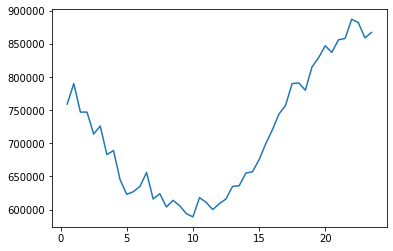

In [3]:
plt.plot(hour_count,yeast_count)

In [4]:
def my_func(t,N,k,q0,c,P0,m=-0.5):
    val = []
    for i in t:
        u = (k/c)*np.log(np.abs((1+q0*np.exp((3.6*c)*i))/(1+q0)))
        square_brackets = 1+((P0/N)**(-m)-1)*np.exp(-m*u)
        val.append(N*(square_brackets)**(-1/m) + 589000)
    return val

$$P(t) = N \left [1 + \left (\left (\frac{P_0}{N} \right )^{-m} -1 \right )e^{-mu} \right ]^{(-m)^{-1}}  $$

$$u = \frac{k}{c} \ln \left ( \left | \frac{1+q_0 e^{kt}}{1+q_0} \right | \right )$$

In [5]:
opt.curve_fit(my_func, hour_count, yeast_count, p0=[80001, -0.5, 2, 0.3, 70000])

/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/home/morgan/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([nan, nan, nan, nan, nan]), array([[inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf]]))

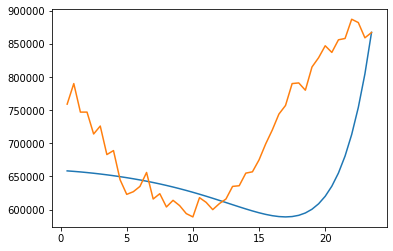

In [14]:
plt.plot(hour_count, my_func(hour_count, N=80500, m=-0.5, q0=2, c=0.3,P0=70000))
plt.plot(hour_count,yeast_count)

In [7]:
my_func(hour_count, N=3.60659141e+01, m=1.05821076e+00, c=3.5, k=-4.74633164e+00, q0=4.70748934e-03, P0=4.4)

TypeError: my_func() got an unexpected keyword argument 'k'

In [ ]:
k=-4.74633164e+00
type(k)
k*hour_count